In [4]:
# Plantea un ejercicio de modelado biomédico con Python
# Se trata de un modelo de la dinámica de una población de células tumorales
# Se plantea un modelo de ecuaciones diferenciales que describen la evolución
# de la población de células tumorales en función del tiempo.

# Se importan las librerías necesarias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [5]:
# Importar la librería fm de matplotlib
from matplotlib import font_manager as fm

# Configurar el estilo de los gráficos ggplot
plt.style.use('classic')

# Ruta a la fuente personalizada
font_path = 'KellySlab-Regular.ttf'  # Rura a la fuente personalizada

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

# **Glucosa en Sangre**

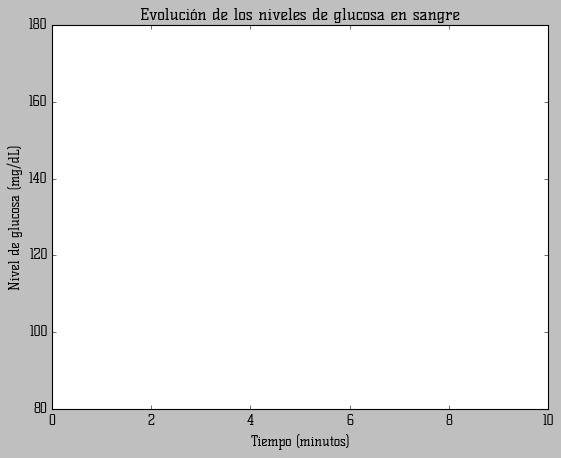

MovieWriter imagemagick unavailable; using Pillow instead.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Paso 1: Parámetros iniciales
tiempo = np.linspace(0, 10, 100)  # Tiempo en minutos, de 0 a 10
glucosa_inicial = 90  # Nivel de glucosa inicial en mg/dL
comida_tiempo = 3  # Momento de la comida en minutos
aumento_comida = 80  # Aumento en los niveles de glucosa después de la comida
decadencia = 0.05  # Tasa de disminución de los niveles de glucosa con el tiempo

# Función para calcular el nivel de glucosa en sangre en función del tiempo
def calcular_glucosa(t):
    if t < comida_tiempo:
        return glucosa_inicial  # Antes de la comida, los niveles son estables
    else:
        # Después de la comida, el nivel aumenta y luego disminuye
        tiempo_post_comida = t - comida_tiempo
        glucosa = glucosa_inicial + aumento_comida - decadencia * tiempo_post_comida
        return max(glucosa, glucosa_inicial)  # Los niveles no bajan de la glucosa inicial

# Paso 2: Crear la gráfica y la animación
fig, ax = plt.subplots()
line, = ax.plot([], [], 'r-', lw=2)
ax.set_xlim(0, 10)  # Limites del tiempo (0 a 10 minutos)
ax.set_ylim(80, 180)  # Limites del nivel de glucosa (80 a 180 mg/dL)
ax.set_xlabel('Tiempo (minutos)')
ax.set_ylabel('Nivel de glucosa (mg/dL)')
ax.set_title('Evolución de los niveles de glucosa en sangre')

# Función de inicialización
def init():
    line.set_data([], [])
    return line,

# Función para actualizar la animación
def update(frame):
    t = tiempo[:frame]
    glucosa = [calcular_glucosa(tiempo_point) for tiempo_point in t]
    line.set_data(t, glucosa)
    return line,

# Crear la animación
ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True, interval=100)

# Mostrar la animación
plt.show()

anim.save("P1.gif", writer="imagemagick")

# **Neuroplasticidad Cerebral**

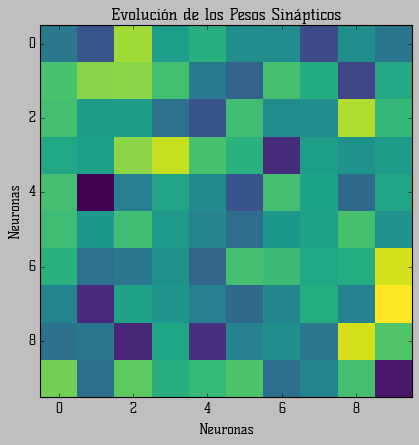

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Número de neuronas en la red
num_neurons = 10

# Inicialización de las actividades de las neuronas (entrada de la red)
# Las neuronas están activas o no (valor binario)
np.random.seed(0)
neuronal_activities = np.random.randint(0, 2, (100, num_neurons))

# Inicialización de las sinapsis (conexiones) de la red neuronal
synaptic_weights = np.random.randn(num_neurons, num_neurons)

# Implementación de la regla de aprendizaje Hebbiano
def hebbian_learning(activities, weights, learning_rate=0.01):
    for t in range(len(activities)):
        activity = activities[t]
        # Actualizar los pesos sinápticos según la regla de Hebb
        weights += learning_rate * np.outer(activity, activity)
    return weights

# Aprendizaje hebbiano para actualizar las sinapsis
synaptic_weights = hebbian_learning(neuronal_activities, synaptic_weights)

# Visualización de la evolución de los pesos sinápticos
fig, ax = plt.subplots(figsize=(6, 6))

# Crear la gráfica de los pesos sinápticos
heatmap = ax.imshow(synaptic_weights, cmap='viridis', interpolation='nearest')
ax.set_title('Evolución de los Pesos Sinápticos')
ax.set_xlabel('Neuronas')
ax.set_ylabel('Neuronas')
ax.grid(False)

# Crear la animación para mostrar la evolución
def update(frame):
    ax.clear()
    ax.set_title(f'Evolución de los Pesos Sinápticos - Paso {frame}')
    ax.set_xlabel('Neuronas')
    ax.set_ylabel('Neuronas')
    ax.imshow(synaptic_weights, cmap='viridis', interpolation='nearest')
    ax.grid(False)

    # Realizar un paso de aprendizaje Hebbiano
    synaptic_weights = hebbian_learning(neuronal_activities[:frame+1], synaptic_weights)

# Crear la animación
ani = FuncAnimation(fig, update, frames=100, interval=100, repeat=False)

# Mostrar la animación
plt.show()

# **COVID-19**

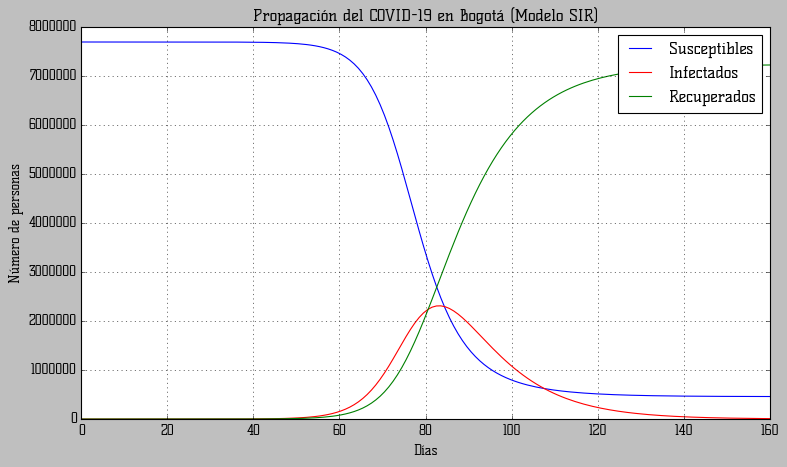

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros del modelo
beta = 0.3  # Tasa de transmisión (ajustable según datos reales)
gamma = 0.1  # Tasa de recuperación (aproximadamente 10 días de recuperación)
population = 7.7e6  # Población de Bogotá (aproximadamente 7.7 millones)

# Condiciones iniciales
S0 = population - 1  # Todos los individuos son susceptibles al principio, menos 1 infectado
I0 = 1  # Un individuo infectado
R0 = 0  # No hay individuos recuperados al principio

# Tiempo en días
t = np.linspace(0, 160, 160)  # Simular por 160 días (5 meses)

# Ecuaciones diferenciales del modelo SIR
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / population
    dIdt = beta * S * I / population - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Solución del sistema de ecuaciones diferenciales
y0 = S0, I0, R0  # Condiciones iniciales
solution = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = solution.T

# Graficar la evolución de S, I, R a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptibles', color='blue')
plt.plot(t, I, label='Infectados', color='red')
plt.plot(t, R, label='Recuperados', color='green')

# Añadir título y etiquetas
plt.title('Propagación del COVID-19 en Bogotá (Modelo SIR)')
plt.xlabel('Días')
plt.ylabel('Número de personas')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

/home/codespace/.local/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


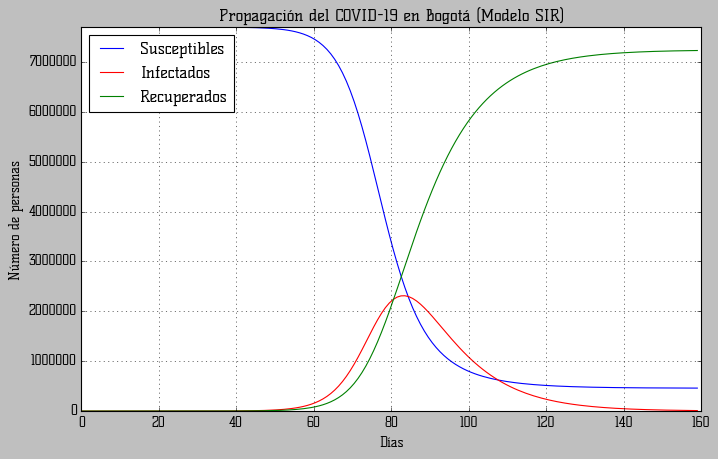

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

# Parámetros del modelo
beta = 0.3  # Tasa de transmisión
gamma = 0.1  # Tasa de recuperación
population = 7.7e6  # Población de Bogotá

# Condiciones iniciales
S0 = population - 1
I0 = 1
R0 = 0

# Tiempo en días
t = np.linspace(0, 160, 160)  # 160 días, es decir, 5 meses

# Ecuaciones diferenciales del modelo SIR
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / population
    dIdt = beta * S * I / population - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Solución del sistema de ecuaciones diferenciales
y0 = S0, I0, R0  # Condiciones iniciales
solution = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = solution.T

# Crear la figura para la animación
fig, ax = plt.subplots(figsize=(10, 6))

# Inicializar las líneas en la gráfica
line_s, = ax.plot([], [], label='Susceptibles', color='blue')
line_i, = ax.plot([], [], label='Infectados', color='red')
line_r, = ax.plot([], [], label='Recuperados', color='green')

# Configuración de los ejes y la gráfica
ax.set_xlim(0, 160)  # Tiempo en días
ax.set_ylim(0, population)  # Número de personas
ax.set_title('Propagación del COVID-19 en Bogotá (Modelo SIR)')
ax.set_xlabel('Días')
ax.set_ylabel('Número de personas')
ax.legend(loc='best')
ax.grid(True)

# Función para inicializar la animación
def init():
    line_s.set_data([], [])
    line_i.set_data([], [])
    line_r.set_data([], [])
    return line_s, line_i, line_r

# Función de actualización para la animación
def update(frame):
    line_s.set_data(t[:frame], S[:frame])
    line_i.set_data(t[:frame], I[:frame])
    line_r.set_data(t[:frame], R[:frame])
    return line_s, line_i, line_r

# Crear la animación
ani = FuncAnimation(fig, update, frames=range(1, len(t)), init_func=init, blit=True, interval=100, repeat=False)

# Guardar la animación como un GIF
ani.save('propagacion_covid19_bogota.gif', writer='pillow', fps=20)

# Mostrar la animación
plt.show()

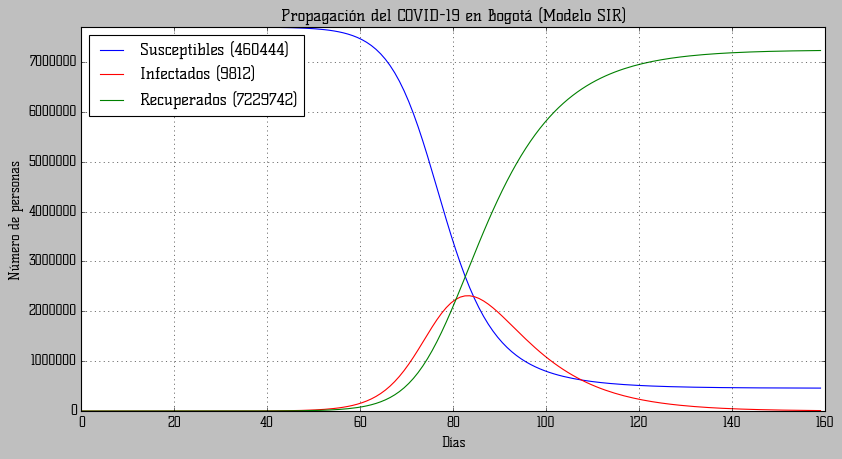

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

# Parámetros del modelo
beta = 0.3  # Tasa de transmisión
gamma = 0.1  # Tasa de recuperación
population = 7.7e6  # Población de Bogotá

# Condiciones iniciales
S0 = population - 1
I0 = 1
R0 = 0

# Tiempo en días
t = np.linspace(0, 160, 160)  # 160 días, es decir, 5 meses

# Ecuaciones diferenciales del modelo SIR
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / population
    dIdt = beta * S * I / population - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Solución del sistema de ecuaciones diferenciales
y0 = S0, I0, R0  # Condiciones iniciales
solution = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = solution.T

# Crear la figura para la animación
fig, ax = plt.subplots(figsize=(12,6))

# Inicializar las líneas en la gráfica
line_s, = ax.plot([], [], label=f'Susceptibles (0)', color='blue')
line_i, = ax.plot([], [], label=f'Infectados (0)', color='red')
line_r, = ax.plot([], [], label=f'Recuperados (0)', color='green')

# Configuración de los ejes y la gráfica
ax.set_xlim(0, 160)  # Tiempo en días
ax.set_ylim(0, population)  # Número de personas
ax.set_title('Propagación del COVID-19 en Bogotá (Modelo SIR)')
ax.set_xlabel('Días')
ax.set_ylabel('Número de personas')
ax.grid(True)

# Función para inicializar la animación
def init():
    line_s.set_data([], [])
    line_i.set_data([], [])
    line_r.set_data([], [])
    return line_s, line_i, line_r

# Función de actualización para la animación
def update(frame):
    # Actualizamos los datos de las líneas
    line_s.set_data(t[:frame], S[:frame])
    line_i.set_data(t[:frame], I[:frame])
    line_r.set_data(t[:frame], R[:frame])

    # Actualizamos las leyendas con el número de personas
    line_s.set_label(f'Susceptibles ({int(S[frame-1])})')
    line_i.set_label(f'Infectados ({int(I[frame-1])})')
    line_r.set_label(f'Recuperados ({int(R[frame-1])})')

    # Actualizamos la leyenda de la gráfica
    ax.legend(loc='best')

    return line_s, line_i, line_r

# Crear la animación
ani = FuncAnimation(fig, update, frames=range(1, len(t)), init_func=init, blit=True, interval=1000, repeat=False)

# Guardar la animación como un GIF
ani.save('propagacion_covid19_bogota_con_leyenda.gif', writer='pillow', fps=20)

# Mostrar la animación
plt.show()